In [1]:
#test to see if we can actually load in the data ourselves and get something out of it
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pandas as pd
from sklearn.linear_model import LinearRegression
#img = nib.load('train_1.nii')
#img.shape;

In [2]:
import matplotlib.pyplot as plt
from IPython.display import *


def displayPlot(plt):
    plt.savefig("temp_plot.png")
    display(Image(filename='temp_plot.png'))

In [3]:
#Read the processed data provided by Caifa and put it in dataMatrix[i][j]. i ranges from 0 to 6 and denotes
# mean, variance, standard variance, median, skewness, kurtosis and finally age. j are the different samples
from numpy import genfromtxt
dataMatrix = genfromtxt('feature extraction\cluster_1_org.csv', delimiter=',')
X_test = genfromtxt('feature extraction\cluster_1_test_org.csv', delimiter=',')

In [4]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, number, models_to_plot):
    #initialize predictors:
    predictors=['x']
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[number][predictors], data[number]['y'])
    y_pred = linreg.predict(data[number][predictors])
    
    #Check if a plot is to be made for the entered power
    
    plt.subplot(models_to_plot[number])
    plt.tight_layout()
    plt.plot(data[number]['x'],y_pred)
    plt.plot(data[number]['x'],data[number]['y'],'.')
    plt.title('linear model: %d'%number)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data[number]['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [5]:
from sklearn.linear_model import Ridge
def ridge_regression(data, number, alpha, models_to_plot):
    #initialize predictors:
    predictors=['x']
    
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[number][predictors],data[number]['y'])
    y_pred = ridgereg.predict(data[number][predictors])
    
    #Check if a plot is to be made for the entered power
    
    plt.subplot(models_to_plot[number])
    plt.tight_layout()
    plt.plot(data[number]['x'],y_pred)
    plt.plot(data[number]['x'],data[number]['y'],'.')
    plt.title('ridge model: %d'%number)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data[number]['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [8]:
from sklearn.linear_model import Lasso
def lasso_regression(data, number, alpha, models_to_plot):
    #initialize predictors:
    predictors=['x']
    
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[number][predictors],data[number]['y'])
    y_pred = lassoreg.predict(data[number][predictors])
    
    #Check if a plot is to be made for the entered power
    
    plt.subplot(models_to_plot[number])
    plt.tight_layout()
    plt.plot(data[number]['x'],y_pred)
    plt.plot(data[number]['x'],data[number]['y'],'.')
    plt.title('lasso model: %d'%number)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data[number]['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

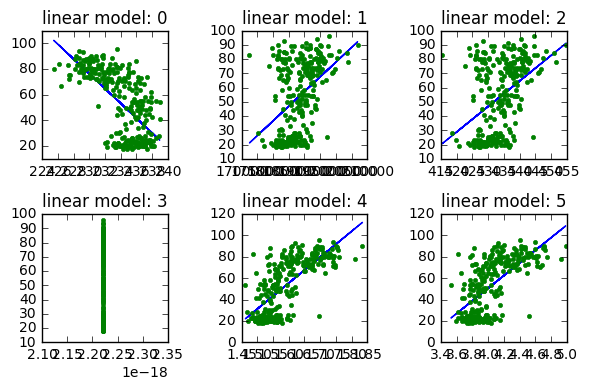

,rss,intercept,coef_x
linear model_0,"99,369.97675","1,403.028114",-5.768462342
linear model_1,"145,706.8883",-334.9492525,0.002064244903
linear model_2,"145,922.8293",-722.3361991,1.788651053
linear model_3,"177,958.0432",53.61151079,0
linear model_4,"87,641.15422",-332.2732714,242.327136
linear model_5,"102,569.3791",-185.5228489,59.04847359


In [9]:
data = [pd.DataFrame(np.column_stack([dataMatrix[i] ,dataMatrix[6]]),columns=['x','y']) for i in range(0, len(dataMatrix)-1)]

#property_name = ['mean', 'variance' , 'standard diversion', 'median', 'skewness', 'kurtosis']
models_to_plot_linear = {0:231,1:232,2:233,3:234,4:235,5:236}
     
#Initialize a dataframe to store the results:
col = ['rss','intercept','coef_x']
ind = ['linear model_%d'%i for i in range(0,len(dataMatrix) - 1)]
coef_matrix_linear_regression = pd.DataFrame(index=ind, columns=col)

#Iterate through all powers and assimilate results
for i in range(0,len(dataMatrix)-1):
    coef_matrix_linear_regression.iloc[i,] = linear_regression(data, number=i, models_to_plot=models_to_plot_linear)
plt.show()
pd.options.display.float_format = '{:,.10g}'.format
coef_matrix_linear_regression

1


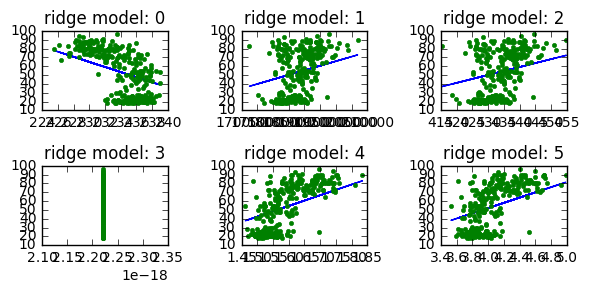

,rss,intercept,coef_x
ridge model_0,"119,016.9934",728.3198123,-2.884231171
ridge model_1,"153,769.677",-140.6688708,0.001032122452
ridge model_2,"153,931.6327",-334.3623442,0.8943255264
ridge model_3,"177,958.0432",53.61151079,0
ridge model_4,"110,220.3765",-139.3308803,121.163568
ridge model_5,"121,416.5451",-65.95566905,29.5242368


In [10]:
data = [pd.DataFrame(np.column_stack([dataMatrix[i] ,dataMatrix[6]]),columns=['x','y']) for i in range(0, len(dataMatrix)-1)]

models_to_plot_ridge = {0:331,1:332,2:333,3:334,4:335,5:336}

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 100, 1000]
alpha = alpha_ridge[6]
print(alpha)

#Initialize a dataframe to store the results:
col = ['rss','intercept','coef_x']
ind = ['ridge model_%d'%i for i in range(0,len(dataMatrix) - 1)]
coef_matrix_ridge_regression = pd.DataFrame(index=ind, columns=col)

#Iterate through all powers and assimilate results
for i in range(0,len(dataMatrix)-1):
    coef_matrix_ridge_regression.iloc[i,] = ridge_regression(data, number=i, alpha=alpha, models_to_plot=models_to_plot_ridge)
plt.show()
pd.options.display.float_format = '{:,.10g}'.format
coef_matrix_ridge_regression

1e-10


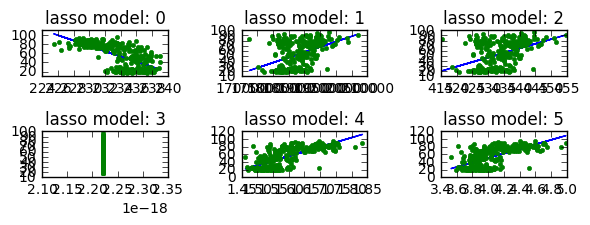

,rss,intercept,coef_x
lasso model_0,"99,369.97675","1,403.028114",-5.768462341
lasso model_1,"145,706.8883",-334.9492524,0.002064244903
lasso model_2,"145,922.8293",-722.336199,1.788651053
lasso model_3,"177,958.0432",53.61151079,0
lasso model_4,"87,641.15422",-332.2732714,242.327136
lasso model_5,"102,569.3791",-185.5228489,59.04847359


In [13]:
data = [pd.DataFrame(np.column_stack([dataMatrix[i] ,dataMatrix[6]]),columns=['x','y']) for i in range(0, len(dataMatrix)-1)]

models_to_plot_lasso = {0:431,1:432,2:433,3:434,4:435,5:436}

#Set the different values of alpha to be tested
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 100, 1000]
alpha = alpha_lasso[1]
print(alpha)

#Initialize a dataframe to store the results:
col = ['rss','intercept','coef_x']
ind = ['lasso model_%d'%i for i in range(0,len(dataMatrix) - 1)]
coef_matrix_lasso_regression = pd.DataFrame(index=ind, columns=col)

#Iterate through all powers and assimilate results
for i in range(0,len(dataMatrix)-1):
    coef_matrix_lasso_regression.iloc[i,] = lasso_regression(data, number=i, alpha=alpha, models_to_plot=models_to_plot_lasso)
plt.show()
pd.options.display.float_format = '{:,.10g}'.format
coef_matrix_lasso_regression